In [43]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import json

In [46]:
provinces_data_path=  "/Users/user/Documents/Coding/geo/voronoi/thailand_province_amphoe_tambon.json"
provinces_data = json.load(open(provinces_data_path))
provinces_data.keys()

dict_keys(['type', 'arcs', 'transform', 'objects'])

In [62]:
province_list = []
for entity_data in provinces_data['objects']["thailand_province_amphoe_tambon"]['geometries']:
    # print(entity_data.keys())
    # print(entity_data['properties'].keys())
    # print(entity_data['properties']['ADM1_EN'])
    province = entity_data['properties']['ADM1_EN']
    if province not in province_list:
        province_list.append(province)

In [63]:
len(province_list)

77

In [65]:
G = ox.graph_from_place("ChonBuri", network_type="drive", simplify=False)
type(G)

networkx.classes.multidigraph.MultiDiGraph

In [72]:
thailand_area_km2 = 513_120 # km^2
thailand_area_m2 = thailand_area_km2 * 1000 * 1000
# if i want to create a grid with space width and space height
space = 1000 # meter
space_area = space * space # m^2
# roughly how many grid cells do we need?
grid_cell_count = thailand_area_m2 / space_area
# print as number with , separator
print(f"{grid_cell_count:,}")

513,120.0


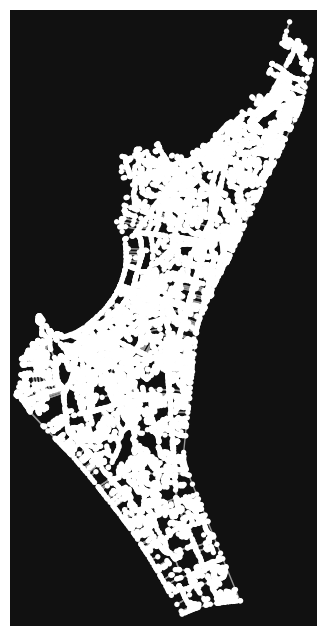

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
ox.plot_graph(G)


In [ ]:
nodes, edges = ox.graph_to_gdfs(G)

# Display the GeoDataFrames
print("Nodes GeoDataFrame:")
display(nodes.head())
print("\nEdges GeoDataFrame:")
display(edges.head())


Nodes GeoDataFrame:


,y,x,street_count,highway,geometry
osmid,,,,,
276775516,12.953686,100.883690,4,NaN,POINT (100.88369 12.95369)
276775523,12.950095,100.886577,2,NaN,POINT (100.88658 12.95010)
276775530,12.950863,100.887531,3,NaN,POINT (100.88753 12.95086)
276775532,12.950931,100.887429,3,NaN,POINT (100.88743 12.95093)
276775534,12.951008,100.887412,2,NaN,POINT (100.88741 12.95101)



Edges GeoDataFrame:


osmid lanes           name      highway  \
u         v           key                                                
276775516 276780850   0     25395320     2     นาเกลือ 20  residential   
          11171005636 0     34262264   NaN            NaN  residential   
          554180231   0     43761111   NaN            NaN  residential   
          5887673816  0    695503326   NaN            NaN  residential   
276775523 3471557717  0    350135615     3  พัทยาสายหนึ่ง     tertiary   

                           oneway  reversed   length junction access  ref  \
u         v           key                                                   
276775516 276780850   0     False     False  319.860      NaN    NaN  NaN   
          11171005636 0     False      True   15.596      NaN    NaN  NaN   
          554180231   0     False     False  140.486      NaN    NaN  NaN   
          5887673816  0     False     False   19.160      NaN    NaN  NaN   
276775523 3471557717  0      True     False   20.852      NaN    NaN  NaN   

                          width bridge maxspeed tunnel  \
u         v           key                                
276775516 276780850   0     NaN    NaN      NaN    NaN   
          11171005636 0     NaN    NaN      NaN    NaN   
          554180231   0     NaN    NaN      NaN    NaN   
          5887673816  0     NaN    NaN      NaN    NaN   
276775523 3471557717  0     NaN    NaN      NaN    NaN   

                                                                    geometry  
u         v           key                                                     
276775516 276780850   0    LINESTRING (100.88369 12.95369, 100.88657 12.9...  
          11171005636 0    LINESTRING (100.88369 12.95369, 100.88370 12.9...  
          554180231   0    LINESTRING (100.88369 12.95369, 100.88239 12.9...  
          5887673816  0    LINESTRING (100.88369 12.95369, 100.88368 12.9...  
276775523 3471557717  0    LINESTRING (100.88658 12.95010, 100.88640 12.9...

In [ ]:
edges.shape

(28102, 15)

In [ ]:
# count null in edges
edges.isnull().sum()

osmid           0
lanes       18644
name        16486
highway         0
oneway          0
reversed        0
length          0
junction    28021
access      28032
ref         27981
width       28099
bridge      28006
maxspeed    27787
tunnel      28096
geometry        0
dtype: int64

In [ ]:
edges['highway'].unique()

array(['residential', 'tertiary', 'unclassified', 'trunk', 'trunk_link',
       'secondary', 'tertiary_link', 'living_street', 'motorway_link',
       'motorway'], dtype=object)

In [ ]:
edges[edges['highway'].isin(['residential', 'tertiary', 'trunk', 'unclassified', 'motorway','secondary'])].shape

(27566, 15)

In [ ]:
# edges.explore()
# sample explore()
sampled_edges = edges.sample(n=100)
sampled_edges.explore()


In [40]:
import osmnx as ox


<Axes: >

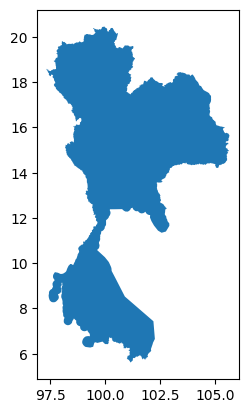

In [41]:
# get polygon of thailand
place = ox.geocode_to_gdf('Thailand')
place.plot()

AttributeError: module 'osmnx' has no attribute 'geocode_to_bbox'

In [34]:

# Specify the location as "Thailand"
# place_name = "Thailand"
place_name = "Chonburi, pattaya  "

# Retrieve the street network for Thailand using a less detailed network type
graph = ox.graph_from_place(
    place_name, 
    network_type="all",
    # simplify=True,
    simplify=False,
    )

# Visualize the network


In [38]:
# convert MultiDiGraph to geopandas 
nodes, edges = ox.graph_to_gdfs(graph)

In [36]:
edges.head(1)

,,,osmid,lanes,name,highway,oneway,reversed,length,junction,access,service,ref,bridge,width,maxspeed,tunnel,geometry
u,v,key,,,,,,,,,,,,,,,,
276775516,276780850,0,25395320,2,นาเกลือ 20,residential,False,False,319.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"LINESTRING (100.88369 12.95369, 100.88657 12.9..."


In [ ]:
ox.save_graph_shapefile(graph, filepath=f'shapefile/{place_name}')

In [ ]:
nodes, edges = ox.graph_to_gdfs(graph)
